In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/weather/weather_description.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   datetime           45253 non-null  object
 1   Vancouver          44460 non-null  object
 2   Portland           45252 non-null  object
 3   San Francisco      44460 non-null  object
 4   Seattle            45252 non-null  object
 5   Los Angeles        45252 non-null  object
 6   San Diego          45252 non-null  object
 7   Las Vegas          45252 non-null  object
 8   Phoenix            45252 non-null  object
 9   Albuquerque        45252 non-null  object
 10  Denver             45252 non-null  object
 11  San Antonio        45252 non-null  object
 12  Dallas             45252 non-null  object
 13  Houston            45252 non-null  object
 14  Kansas City        45252 non-null  object
 15  Minneapolis        45252 non-null  object
 16  Saint Louis        45252 non-null  objec

In [4]:
keep = ['datetime', 'Chicago']
df = df[keep]

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df[df['datetime'].dt.year == 2015].copy()

In [6]:
print(df['Chicago'].unique())

['sky is clear' 'scattered clouds' 'few clouds' 'broken clouds' 'snow'
 'light rain' 'moderate rain' 'heavy intensity rain' 'light snow'
 'overcast clouds' 'heavy snow' 'very heavy rain' 'mist' 'haze'
 'light intensity drizzle' 'drizzle' 'thunderstorm' 'fog'
 'proximity thunderstorm' 'thunderstorm with rain'
 'thunderstorm with heavy rain' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'squalls' 'heavy intensity drizzle' 'freezing rain']


<Axes: xlabel='Chicago', ylabel='count'>

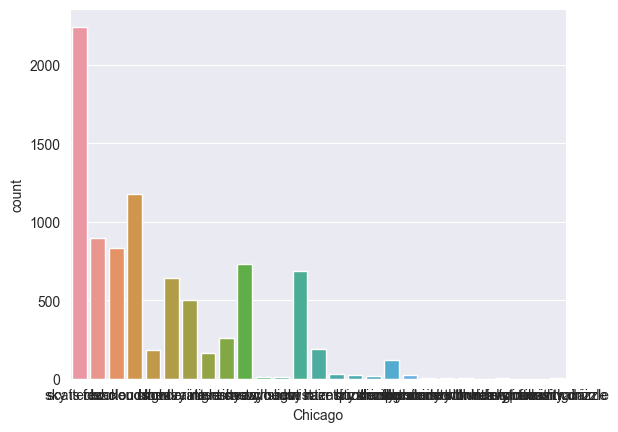

In [8]:
import seaborn as sns

sns.countplot(x=df['Chicago'])

In [33]:
def check_precipitation(value):
    if value in ['rain', 'snow']:
        return 1
    else:
        return 0

In [34]:
df['Precip'] = df['Chicago'].apply(check_precipitation)

In [35]:
del df['Chicago']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 19716 to 28475
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  8760 non-null   datetime64[ns]
 1   Precip    8760 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 205.3 KB


In [37]:
df.to_parquet('../../data/weather/weather_description_cleaned.parquet')